# Proyecto

**Objetivos**:

* Realizar un análisis exploratorio de datos (EDA) con la finalidad de mejor la distribución de los datos utilizados (en este caso, las caracteristicas de los picos de los fringílidos a lo largo de los años y de la información hereditaria), como estan clasificados, su distribución, media, quartiles, etc.

* Determinar mediante una prueba de hipótesis si realmente hubo un cambio entre las caracteristicas del pico de estos animales a lo largo de los años.

* Adicional al punto anterior, tratar de determinar si existe una relación entre el las características físicas de los padres y aquellas de las crías.

In [1]:
# Librerias utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Sobre el conjunto de Datos

Durante los últimos más de 40 años (de 1973 a 2013), Peter y Rosemary Grant visitaron la isla Daphne Major de Galápagos y recopilaron datos sobre los pinzones de Darwin para estudiar la teoría de la evolución de Darwin.

Los Grant pasan años observando, marcando y midiendo los pinzones de Darwin y su entorno. Durante ese tiempo documentaron cambios ambientales y cómo estos cambios favorecieron a ciertos individuos dentro de la población, ilustrando la selección natural en acción.

El conjunto de datos se centra en la dimensión del pico de los pinzones. Para los pinzones, el tamaño y la forma de sus picos son rasgos que varían para adaptarse a los cambios ambientales. La relación entre el tamaño del pico y los eventos ecológicos que se ha popularizado un poco como un ejemplo de "evolución que ocurre ante nuestros ojos".



In [2]:
df_1975 = pd.read_csv('./data/finch_beaks_1975.csv')
df_2012 = pd.read_csv('./data/finch_beaks_2012.csv')

Comenzamos por hacer un procesamiento de los datos y hacer cálculos de estadística descriptiva junto con un Análisis Exploratorio de Datos.

Tenemos en total 4 conjuntos de Datos
- Finch Beak 1975: La medida del pico de los pinzones registrada en 1975.
- Finch Beak 2012: La medida del pico de los pinzones registrada en 2012.
- Fortis Beak Depth Heredity: Información hereditaria del pico de G. fortis.
- Scandens Beak Depth Heredity: Información hereditaria del pico de G. scandens.

In [3]:
df_1975.info() # No hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   band             403 non-null    int64  
 1   species          403 non-null    object 
 2   Beak length, mm  403 non-null    float64
 3   Beak depth, mm   403 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.7+ KB


In [4]:
df_2012.info() # Tampoco hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   band     248 non-null    int64  
 1   species  248 non-null    object 
 2   blength  248 non-null    float64
 3   bdepth   248 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.9+ KB


## Estadística descriptiva

Tras ver la información de los datos, vemos que no existen datos faltantes. Además que la mayoría de las variables son numéricas, exceptuando por las especies.

Si observamos los valores de la columna species...

In [5]:
# Vemos que los valores de la columna species son fortis y scandens en ambos dataframes
print(df_1975['species'].unique()) 
print(df_2012['species'].unique())

['fortis' 'scandens']
['fortis' 'scandens']



Otra cosa que hay que observar es que el nombre de las columnas no son iguales (tanto en el dataframe de 1975 como en el de 2012). Renombraremos las columnas para mantener la consistencia entre los dos dataframes


In [6]:
# Renombrando las columnas para mantener consistencia entre los nombres

df_1975.rename(
    columns={'Beak length, mm': 'beak_length', 'Beak depth, mm': 'beak_depth'}, 
    inplace=True
)

df_2012.rename(
    columns={'blength': 'beak_length', 'bdepth': 'beak_depth'},
    inplace=True
)

Podemos extraer medidas de tendencia central sobre los datasets (media, moda, desviación estandar, quartiles)

In [7]:
df_1975.describe()

,band,beak_length,beak_depth
count,403.000000,403.000000,403.000000
mean,1873.183623,11.332804,9.125955
std,4584.953069,1.619126,0.708737
min,2.000000,8.700000,7.500000
25%,458.500000,10.200000,8.600000
50%,671.000000,10.900000,9.100000
75%,899.500000,11.740000,9.700000
max,20298.000000,15.940000,10.980000


In [8]:
df_2012.describe()

,band,beak_length,beak_depth
count,248.000000,248.000000,248.000000
mean,20119.641129,12.004315,8.902823
std,844.713528,1.642203,0.757521
min,19022.000000,9.000000,7.200000
25%,19436.750000,10.475000,8.300000
50%,19817.500000,12.300000,8.900000
75%,21135.250000,13.425000,9.400000
max,22000.000000,15.200000,11.100000


Sin embargo, esto no nos dice mucho, ya que combina ambas especies. Mejor hay que crear un dataset para cada especie, dependiendo del año en que fueron registrados:

In [9]:
# Primero, agreguemos una columna para diferenciar los datos de 1975 y 2012
df_1975['year'] = 1975
df_2012['year'] = 2012

In [10]:
# Filtremos los dataframes para la especie 'Scandens' y concatémoslo en un solo dataset

df_1975_scandens = df_1975[df_1975['species']=='scandens']
df_2012_scandens = df_2012[df_2012['species']=='scandens']

df_scandens = pd.concat([df_1975_scandens, df_2012_scandens], ignore_index=True)

df_scandens

,band,species,beak_length,beak_depth,year
0,302,scandens,13.9,8.4,1975
1,304,scandens,14.0,8.8,1975
2,306,scandens,12.9,8.4,1975
3,310,scandens,13.5,8.0,1975
4,317,scandens,12.9,7.9,1975
...,...,...,...,...,...
209,21295,scandens,14.2,9.3,2012
210,21297,scandens,13.0,9.8,2012
211,21340,scandens,14.6,8.9,2012
212,21342,scandens,13.1,9.8,2012


## Realizando un análisis sobre la Evolución de la especie Scandens

A continuación, haremos un EDA sobre el dataframe generado

In [11]:
df_scandens.describe()

,band,beak_length,beak_depth,year
count,214.000000,214.000000,214.000000,214.000000
mean,13168.897196,13.705561,9.094252,1996.957944
std,9373.844153,0.809788,0.637941,18.216566
min,302.000000,11.400000,7.700000,1975.000000
25%,724.750000,13.100000,8.662500,1975.000000
50%,19459.000000,13.700000,9.075000,2012.000000
75%,20204.500000,14.187500,9.500000,2012.000000
max,21347.000000,15.940000,11.000000,2012.000000


<Axes: xlabel='beak_length', ylabel='Count'>

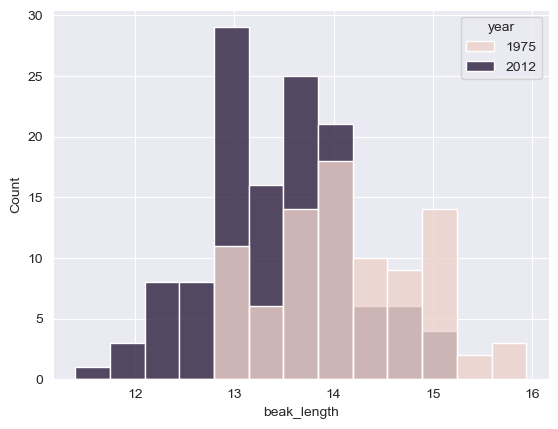

In [34]:
df_scandens_plot = df_scandens.copy()
df_scandens_plot = df_scandens_plot.drop(['band'], axis=1)

sns.histplot(x = 'beak_length',
             data = df_scandens_plot,
             hue = 'year',
             alpha = 0.8)

Estudiemos cómo ha cambiado con el tiempo la profundidad del pico (la distancia, de arriba a abajo, de un pico cerrado) de la especie de la especie scandens. Los Grant notaron algunos cambios en la geometría del pico dependiendo de los tipos de semillas disponibles en la isla, y también notaron que hubo algún mestizaje con otra especie importante en Daphne Major, Geospiza fortis. Estos efectos pueden conducir a cambios en la especie con el tiempo.

Para empezar, representemos todas las medidas de profundidad del pico en 1975 y 2012 en un gráfico de bee swarm.

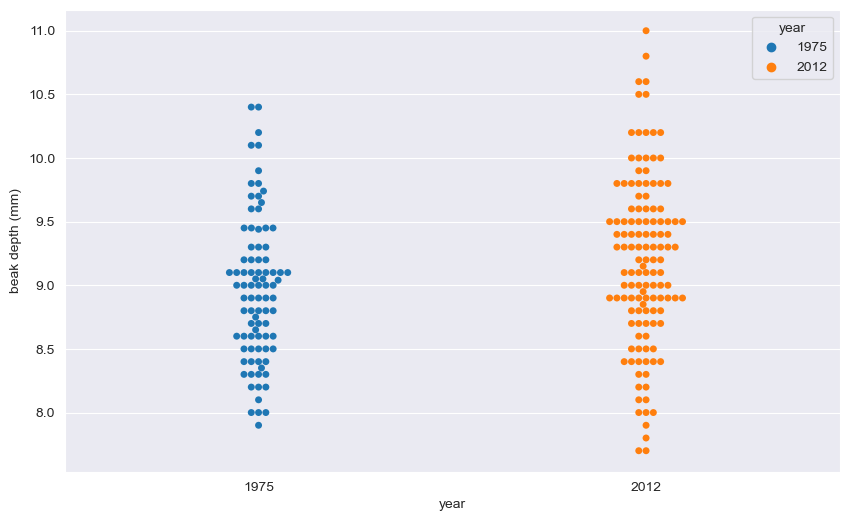

In [13]:
fig = plt.figure(figsize=([10,6]))
sns.set_style('darkgrid')

g = sns.swarmplot(
    x='year',
    y='beak_depth',
    hue='year',
    palette='tab10',
    data=df_scandens
)

plt.xlabel('year')
plt.ylabel('beak depth (mm)')

plt.show()

Es difícil ver si hay una diferencia clara entre el conjunto de datos de 1975 y 2012. Observándolo, parece que la media del conjunto de datos de 2012 podría ser un poco más alta y podría tener una variación mayor.

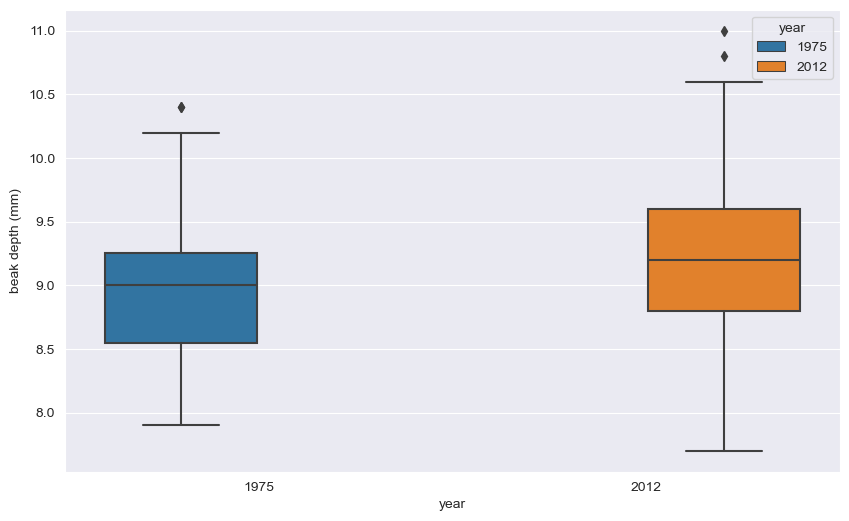

In [14]:
fig = plt.figure(figsize=([10,6]))
sns.set_style('darkgrid')

g = sns.boxplot(
    x='year',
    y='beak_depth',
    hue='year',
    palette='tab10',
    data=df_scandens
)

plt.xlabel('year')
plt.ylabel('beak depth (mm)')

plt.show()

## Realizando un análisis sobre la Evolución de la especie Fortis

A continuación, haremos un EDA sobre el dataframe generado de la especie Fortis

In [15]:
# Filtremos los dataframes para la especie 'Fortis' y concatémoslo en un solo dataset

df_1975_fortis = df_1975[df_1975['species']=='fortis']
df_2012_fortis = df_2012[df_2012['species']=='fortis']

df_fortis = pd.concat([df_1975_fortis, df_2012_fortis], ignore_index=True)

df_fortis

,band,species,beak_length,beak_depth,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975
...,...,...,...,...,...
432,21299,fortis,10.4,7.8,2012
433,21341,fortis,10.5,8.5,2012
434,21343,fortis,10.1,8.2,2012
435,21349,fortis,10.6,9.2,2012


In [16]:
df_fortis.describe()

,band,beak_length,beak_depth,year
count,437.000000,437.000000,437.000000,437.000000
mean,6696.613272,10.551945,9.014851,1985.244851
std,8960.464932,0.711748,0.777729,16.575017
min,2.000000,8.700000,7.200000,1975.000000
25%,528.000000,10.000000,8.400000,1975.000000
50%,820.000000,10.500000,9.000000,1975.000000
75%,19288.000000,11.000000,9.600000,2012.000000
max,22000.000000,12.900000,11.100000,2012.000000


<Axes: xlabel='beak_depth', ylabel='Count'>

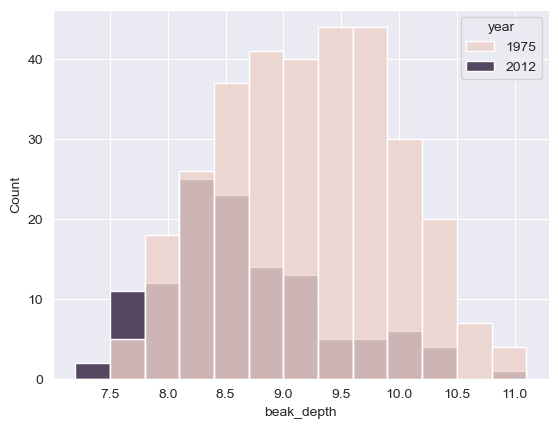

In [35]:
df_fortis_plot = df_fortis.copy()
df_fortis_plot = df_fortis_plot.drop(['band'], axis=1)

sns.histplot(x = 'beak_depth',
             data = df_fortis_plot,
             hue = 'year',
             alpha = 0.8)

Al igual que con la otra, representemos todas las medidas de profundidad del pico en 1975 y 2012 en un gráfico de bee swarm.

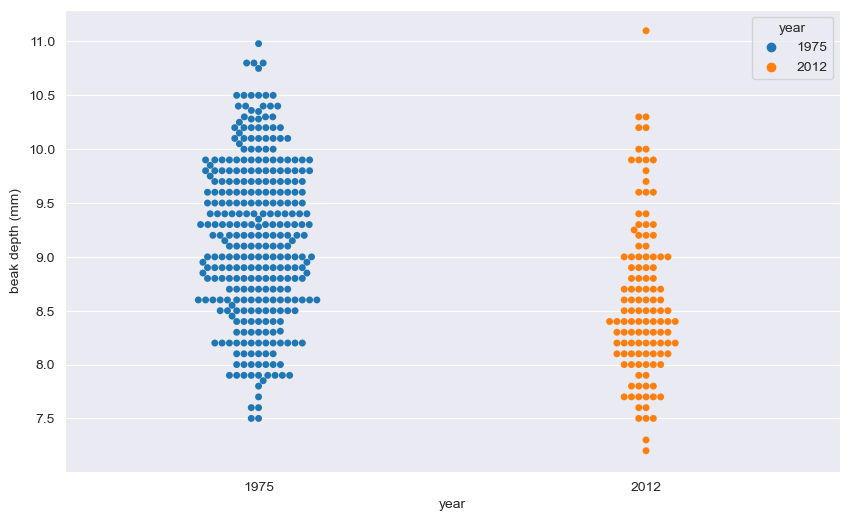

In [18]:
fig = plt.figure(figsize=([10,6]))
sns.set_style('darkgrid')

g = sns.swarmplot(
    x='year',
    y='beak_depth',
    hue='year',
    palette='tab10',
    data=df_fortis
)

plt.xlabel('year')
plt.ylabel('beak depth (mm)')

plt.show()

Veamos como se representan los cuartiles y la media con un boxplot

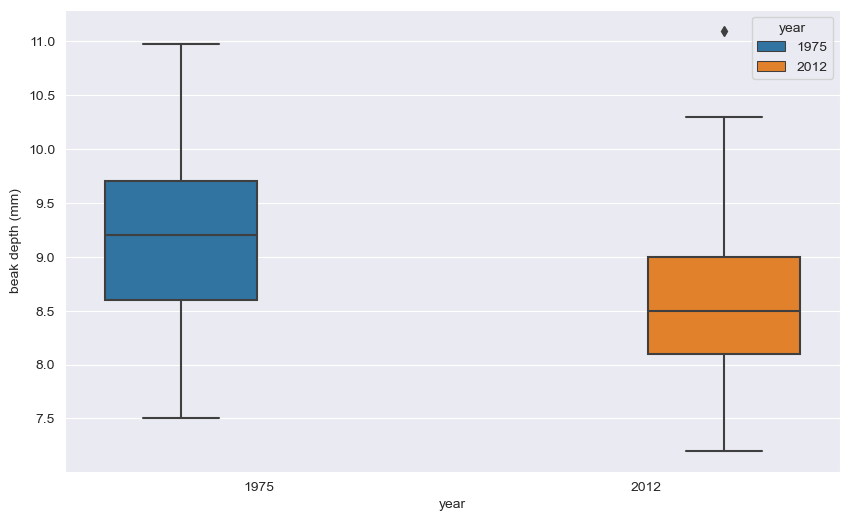

In [19]:
fig = plt.figure(figsize=([10,6]))
sns.set_style('darkgrid')

g = sns.boxplot(
    x='year',
    y='beak_depth',
    hue='year',
    palette='tab10',
    data=df_fortis
)

plt.xlabel('year')
plt.ylabel('beak depth (mm)')

plt.show()

## PARTE JESUS

## ¿Existe realmente una diferencia entre las aves de 1975 y las de 2012?

Uno de los objetivos presentados en este proyecto fue el de determinar si en realidad había una diferencia entre las caracteristicas de los picos de los fringílidos. Para esto podemos realizar una prueba de hipótesis, para tratar de determinar si la media tanto de la longitud como de la profundad de los picos en estas especies es diferente entre los años.

Sin embargo, como nuestro dataset incluye muestras de dos diferentes especies, es necesario separarlas de manera correspondiente.

In [20]:
# Separamos para la especie scandens
df_scandens_1975 = df_1975[df_1975['species'] == 'scandens']
df_scandens_2012 = df_2012[df_2012['species'] == 'scandens']

print(f"Tamaño de muestra G. scandens en 1975: {df_scandens_1975.shape[0]}")
print(f"Tamaño de muestra G. scandens en 2012: {df_scandens_2012.shape[0]}")

Tamaño de muestra G. scandens en 1975: 87
Tamaño de muestra G. scandens en 2012: 127


In [21]:
df_fortis_1975 = df_1975[df_1975['species'] == 'fortis']
df_fortis_2012 = df_2012[df_2012['species'] == 'fortis']

print(f"Tamaño de muestra G. fortis en 1975: {df_fortis_1975.shape[0]}")
print(f"Tamaño de muestra G. fortis en 2012: {df_fortis_2012.shape[0]}")

Tamaño de muestra G. fortis en 1975: 316
Tamaño de muestra G. fortis en 2012: 121


Una vez separadas nuestras muestras, podemos tratar de observar si existe alguna diferencia entre el promedio de éstas.

In [22]:
print(f"Longitud promedio del pico para G. fortis en 1975: {df_fortis_1975['beak_length'].mean():.4f} mm")
print(f"Longitud promedio del pico para G. fortis en 2012: {df_fortis_2012['beak_length'].mean():.4f} mm")

Longitud promedio del pico para G. fortis en 1975: 10.5652 mm
Longitud promedio del pico para G. fortis en 2012: 10.5174 mm


In [23]:
print(f"Profundidad promedio del pico para G. fortis en 1975: {df_fortis_1975['beak_depth'].mean():.4f} mm")
print(f"Profundidad promedio del pico para G. fortis en 2025: {df_fortis_2012['beak_depth'].mean():.4f} mm")

Profundidad promedio del pico para G. fortis en 1975: 9.1716 mm
Profundidad promedio del pico para G. fortis en 2025: 8.6054 mm


A simple vista, puede parecer que tanto la longitud como la profundidad del pico de la especie *G. fortis* parecen haberse encogido, pero para determinar si hay una verdadera diferencia entre las aves en ambos años, podemos plantearnos la siguiente prueba de hipótesis.

$$ 
\begin{matrix}
H_0: & \mu_0 - \mu_1 = 0\\
H_1: & \mu_0 - \mu_1 > 0
\end{matrix}
$$

Donde $\mu_0$ y $\mu_1$ se refieren a la característica promedio de la población de la especie en 1975 y en 2012, respectivamente. Aquí, la hipótesis nula indica que no existe una diferencia entre la característica promedio, es decir que $\mu_0 = \mu_1$, y la hipótesis alternativa propone que la característica del pico se ha encogido con el tiempo, o bien que $\mu_0 > \mu_1$, todo esto para un nivel de confiaza $\alpha = 0.05$.

En los casos donde comparamos dos medias poblacionales, el estadístico de prueba está dado por:

$$
z = \frac{\bar{X} - \bar{Y} - \Delta_0}{\sqrt{\frac{\sigma_{0}^{2}}{m} + \frac{\sigma_{1}^{2}}{n} }}
$$

En nuestro caso, los valores tanto de $\sigma_{0}^{2}$ como $\sigma_{1}^{2}$, los cuales representan las varianzas de ambas poblaciones, nos son desconocidos. Sin embargo, para tamaños de muestra suficientemente grandes, estos valores se pueden sustituir por las respectivas varianzas muestrales $S_{0}^{2}$ y $S_{1}^{2}$.

Por otro lado, $\Delta_0$ hace referencia a la diferencia de medias buscada, la cual en nuestro caso es igual a 0. Con estas nuevas consideraciones, podemos reescribir la expresión anterior como:

$$
z = \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{S_{0}^{2}}{m} + \frac{S_{1}^{2}}{n} }}
$$

Asi, podemos comenzar a definir una funcion para obtener el valor de este estadistico:

In [24]:
def calcular_z(series1,series2):
    """
    Obtener el valor de z a partir de dos series de pandas
    """
    diff_prom = series1.mean() - series2.mean()
    
    valor1_raiz = (series1.var() / series1.size)
    valor2_raiz = (series2.var() / series2.size)
    
    z = diff_prom / np.sqrt(valor1_raiz + valor2_raiz)
    
    return z

Con esto podemos obtener facilmente el valor del estadístico de prueba tanto para la longitud como la profundidad del pico para la especie *G. fortis*:

In [25]:
z_long_fortis = calcular_z(df_fortis_1975['beak_length'],df_fortis_2012['beak_length'])
z_prof_fortis = calcular_z(df_fortis_1975['beak_depth'],df_fortis_2012['beak_depth'])

print(f"Z para la longitud: {z_long_fortis:.3f}")
print(f"Z para la profundidad: {z_prof_fortis:.3f}")

Z para la longitud: 0.579
Z para la profundidad: 7.217


Una vez calculados los valores del estadístico de prueba, debemos obtener el valor crítico de z para saber si rechazaremos la hipótesis nula. Para el caso donde $H_1: \mu_0 - \mu_1 > 0$, el criterio de rechazo de la hipótesis nula para un valor determinado de $\alpha$ es cuando $z \geq z_{\alpha}$. La libreria ```scipy``` nos ofrece una función que nos ayuda a calcular este valor:

In [26]:
z_critico = stats.norm.ppf(0.95)
print(f"Z critico para 0.05: {z_critico:.3f}")

Z critico para 0.05: 1.645


Comparando este valor con los estadísticos de prueba para la longitud y para la profundidad de los picos, podemos hacer las siguientes afirmaciones para la especie *G. fortis*:

* Con los datos recabados, **existe eviencia para rechazar la hipótesis nula para el caso de la profundidad del pico**, con un nivel de confianza del 95%.

* Con los datos recabados, **no existe eviencia para rechazar la hipótesis nula para el caso de la longitud del pico**, con un nivel de confianza del 95%.

Estas afirmaciones nos dan a entender que existe evidencia de una disminución en los tamaños de profundidad del pico para las especies *G. fortis* que habitaban en 1975, y las que habitaban en el año 2012, mas no la existe para el caso de su longitud. Esto puede considerarse como evidencia de la evolución de estas especies a través del tiempo.

Así, podemos realizar el mismo procedimiento para el caso de la segunda especie, *G. scandens*, y sus respectivas longitudes y profundidades del pico:

In [27]:
print(f"Longitud promedio del pico para G. scandens en 1975: {df_scandens_1975['beak_length'].mean():.4f} mm")
print(f"Longitud promedio del pico para G. scandens en 2012: {df_scandens_2012['beak_length'].mean():.4f} mm")

Longitud promedio del pico para G. scandens en 1975: 14.1209 mm
Longitud promedio del pico para G. scandens en 2012: 13.4210 mm


In [28]:
print(f"Profundidad promedio del pico para G. scandens en 1975: {df_scandens_1975['beak_depth'].mean():.4f} mm")
print(f"Profundidad promedio del pico para G. scandens en 2025: {df_scandens_2012['beak_depth'].mean():.4f} mm")

Profundidad promedio del pico para G. scandens en 1975: 8.9600 mm
Profundidad promedio del pico para G. scandens en 2025: 9.1862 mm


In [29]:
z_long_scandens = calcular_z(df_scandens_1975['beak_length'],df_scandens_2012['beak_length'])
z_prof_scandens = calcular_z(df_scandens_1975['beak_depth'],df_scandens_2012['beak_depth'])

print(f"Z para la longitud: {z_long_scandens:.3f}")
print(f"Z para la profundidad: {z_prof_scandens:.3f}")

Z para la longitud: 6.787
Z para la profundidad: -2.663


Recordemos que el valor crítico para esta prueba es de 1.645, por lo que el criterio de rechazo $ z \geq z_{\alpha}$ se cumple para la longitud, mas no para la profundidad. Esto nos indica que, para *G. scandens*:

* Con los datos recabados, **existe eviencia para rechazar la hipótesis nula para el caso de la longitud del pico**, con un nivel de confianza del 95%.

* Con los datos recabados, **no existe eviencia para rechazar la hipótesis nula para el caso de la profundidad del pico**, con un nivel de confianza del 95%.

Con estas afirmaciones, podemos decir que existe evidencia de que la longitud del pico de la especie *G. scandens* se ha ido encogiendo a lo largo de los años, mas no es el caso de la profundidad del mismo.

Ahora bien, tomando en cuenta el caso donde la hipótesis nula no fue rechazada, tenemos que:

* Para *G. scandens*, no hay evidencia de que la **profundidad** del pico haya disminuido.

Sin embargo, si volvemos a las medias muestrales para *G. scandens*, vemos que la media de la profundidad *aumentó* entre 1975 y 2012. Con esto, podríamos proponer una nueva hipótesis alternativa:

$$ 
\begin{matrix}
H_0: & \mu_0 - \mu_1 = 0\\
H_1: & \mu_0 - \mu_1 < 0
\end{matrix}
$$

Esta vez, la hipótesis alternativa propone que la profundidad del pico *aumentó* en este periodo, es decir que $\mu_0 < \mu_1$.

Como ya tenemos los valores correspondientes para $z$ y $z_{\alpha}$, podemos realizar directamente la comparación de estos. Para el criterio de rechazo es $ z \leq -z_{\alpha} $. Sustituyendo los valores obtenidos, tenemos que la expresión se cumple para nuestros valores:

$$ -2.663 \leq -1.645 $$

Con esto, podemos afirmar que para *G. scandens*, existe evidencia para rechazar la hipótesis nula, con lo que podemos afirmar que existe evidencia de que las profundidades de los picos de esta especie *aumentó* entre 1975 y 2012.

## Conclusiones

Para concluir este trabajo, podemos afirmar, tomando en cuenta la evidencia presente, que las características de los picos de estás aves, con una excepción **sí** cambiaron entre 1975 y 2012. Para ser mas especificos, podemos ordenar las afirmaciones hechas en este trabajo en una tabla:

|Especie | Longitud del pico | Profundidad del pico|
|--------|----------|------------|
|*G. fortis*|No cambió|Disminuyó|
|*G. scandens*|Disminiuyó|Aumentó|